In [68]:
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [69]:
def DTW(x, y):
	m = x.shape[0]+1
	n = y.shape[0]+1
	dtw = np.ones((m, n)) * np.inf
	dtw[0,0] = 0
	
	for i in range(1,m):
		for j in range(1,n):
			cost = np.linalg.norm(x[i-1, :] - y[j-1, :])
			penalty = np.array([dtw[i-1, j-1], dtw[i-1, j], dtw[i, j-1]])
			dtw[i, j] = penalty.min() + cost

	return dtw/(m+n)

In [70]:
def read_data(dataset, type, filetype):
	curr = os.getcwd()
	path = f"../../Assets/DTW/Handwritting Data/{dataset}/{type}"
	os.chdir(path)

	dataList = []
	files = [file for file in os.listdir() if file.endswith(filetype)]

	for file in files:
		dataList.append(np.genfromtxt(file, delimiter=' ', dtype=float)[1:].reshape(-1,2))
	os.chdir(curr)
	return dataList

In [71]:
train = []
dev = []

dataset = ['a', 'bA', 'dA', 'lA', 'tA']

for i in dataset:
	train.append(read_data(i, 'train', '.txt'))
	dev.append(read_data(i, 'dev', '.txt'))


In [72]:
for c in range(5):
  for i in range(len(train[c])):
    data = train[c][i]
    slope = []
    for j in range(len(data)):
      if j == len(data)-1 :
        temp = data[j] - data[j-1]
      else:
        temp = data[j+1]-data[j]
      if temp[0] == 0:
        temp[0] = 10 ** -5
      slope.append(temp[1]/temp[0])
    slope = np.array([slope]).reshape(-1,1)
    train[c][i] = np.hstack((train[c][i],slope))
  for i in range(len(dev[c])):
    data = dev[c][i]
    slope = []
    for j in range(len(data)):
      if j == len(data)-1 :
        temp = data[j] - data[j-1]
      else:
        temp = data[j+1]-data[j]
      if temp[0] == 0:
        temp[0] = 10 ** -5
      slope.append(temp[1]/temp[0])
    slope = np.array([slope]).reshape(-1,1)
    dev[c][i] = np.hstack((dev[c][i],slope))


In [73]:
for c in range(5):
  for i in range(len(train[c])):
    data = train[c][i]
    slope = []
    for j in range(len(data)):
      if j == len(data)-1 :
        temp = data[j] - data[j]
      else:
        temp = data[j+1]-data[j]
      slope.append(np.linalg.norm(temp))
    slope = np.array([slope]).reshape(-1,1)
    train[c][i] = np.hstack((train[c][i],slope))
  for i in range(len(dev[c])):
    data = dev[c][i]
    slope = []
    for j in range(len(data)):
      if j == len(data)-1 :
        temp = data[j] - data[j]
      else:
        temp = data[j+1]-data[j]
      slope.append(np.linalg.norm(temp))
    slope = np.array([slope]).reshape(-1,1)
    dev[c][i] = np.hstack((dev[c][i],slope))


In [74]:
C = 60
prediction = np.zeros((5,len(dev[0])))
costs = []
for c in range(5):
	count = 0
	for d in dev[c]:
		cost = []
		for i in range(5):
			for t in train[i]:
				cost.append([DTW(d,t)[-1,-1], i])
		cost = np.array(cost)
		idx = cost[:,0].argsort()
		cost = cost[idx]
		costs.append(cost)
		prediction[c,count] = statistics.mode(cost.reshape(-1,2)[:C,1])
		count += 1

In [75]:
CMatrix = np.zeros((5,5))

for i in range(5):
	for j in range(5):
		CMatrix[j,i] = prediction[i][prediction[i]==j].shape[0]

# print(CMatrix)

<AxesSubplot:>

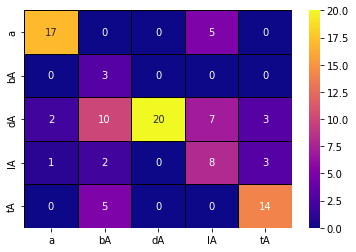

In [76]:
sns.heatmap(CMatrix, annot = True, cmap ='plasma',linecolor ='black', linewidths = 1, fmt = '.0f', xticklabels = dataset, yticklabels = dataset)